# Working with Descriptor Files

The examples here require 

* `sklearn`, `pandas`, `seaborn`, and `matplotlib`
* an descriptors file (here `FFI-desc.pkl`) downloaded from https://2019-ncovgroup.github.io/data/

In [9]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

sns.set_context('talk')

# Load a Dataset from Pickle

In [4]:
data_file = 'FFI-desc.pkl'
data = pd.read_pickle(data_file)

# Data Item Shape
Each entry in the descriptor file is provided as a dictionary where the keys are the molecular SMILES strings, and the entries are the name (str) and descriptors ( numpy array of shape (1826,) )

For example:
```
('NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1', (['Abacavir'], array([ 16.918192 ,  14.245522 ,   0.       , ..., 143.       ,
         5.638889 ,   4.5277777], dtype=float32)))
```

In [5]:
for smiles, (name, descriptors) in data.items():
    print(smiles)
    print(name)
    print(descriptors.shape)
    break

NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1
['Abacavir']
(1826,)


# Check Descriptor Shapes are as Expected

In [6]:
for smiles, (name, descriptors) in data.items():
    assert descriptors.shape == (1826,)

# Display a TSNE Embedding of the Space

In [7]:
X = [descriptors for smiles, (name, descriptors) in data.items()]

df_desc = pd.DataFrame(X).fillna(0.) # Is this advisable?
X_embedded = TSNE(n_components=2).fit_transform(df_desc.values)

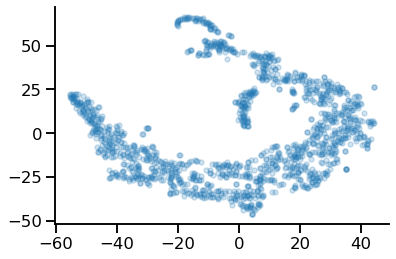

In [10]:
plt.scatter(X_embedded[:,0], 
            X_embedded[:,1], 
            alpha=0.2, 
            s=25)
sns.despine()